<a href="https://colab.research.google.com/github/fidanfatih/NLP_Projects/blob/main/Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP (Natural Language Processing)


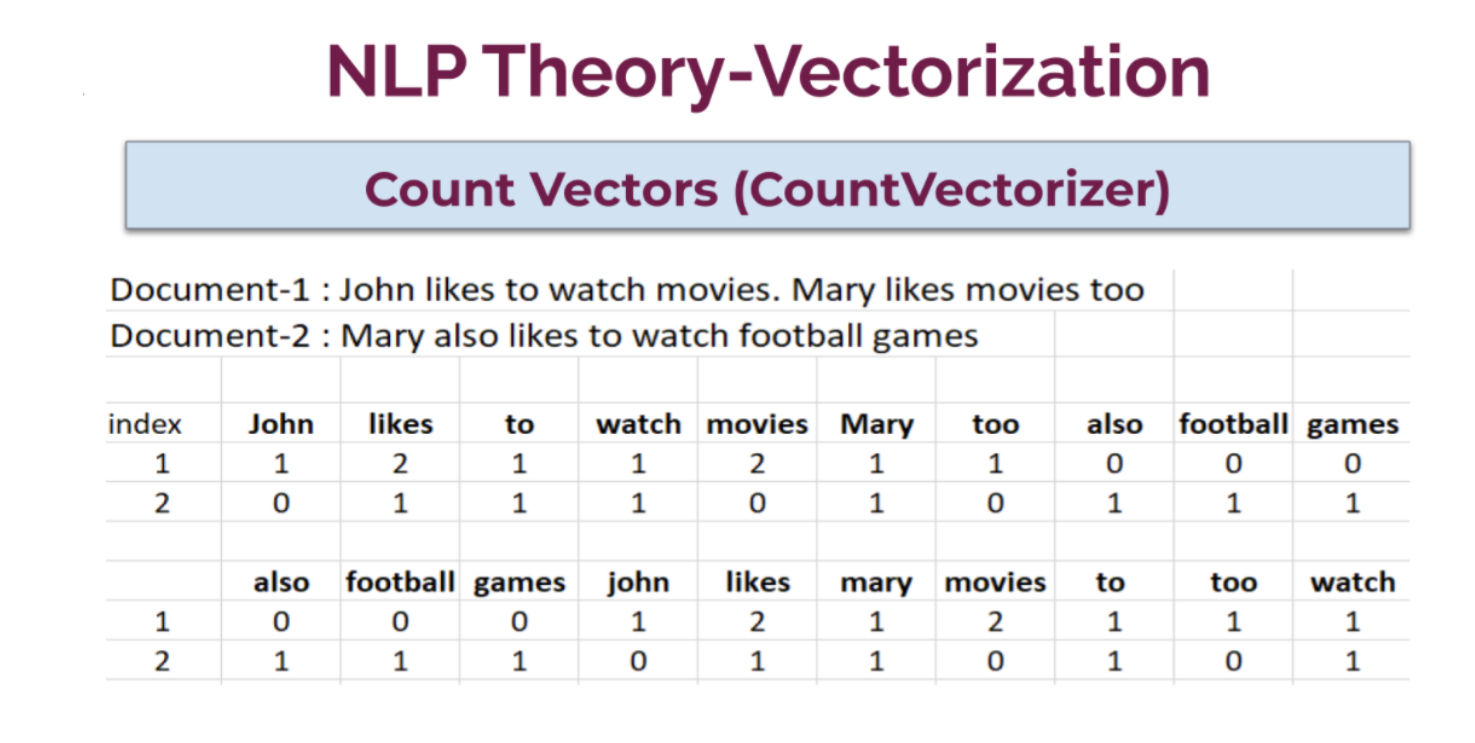

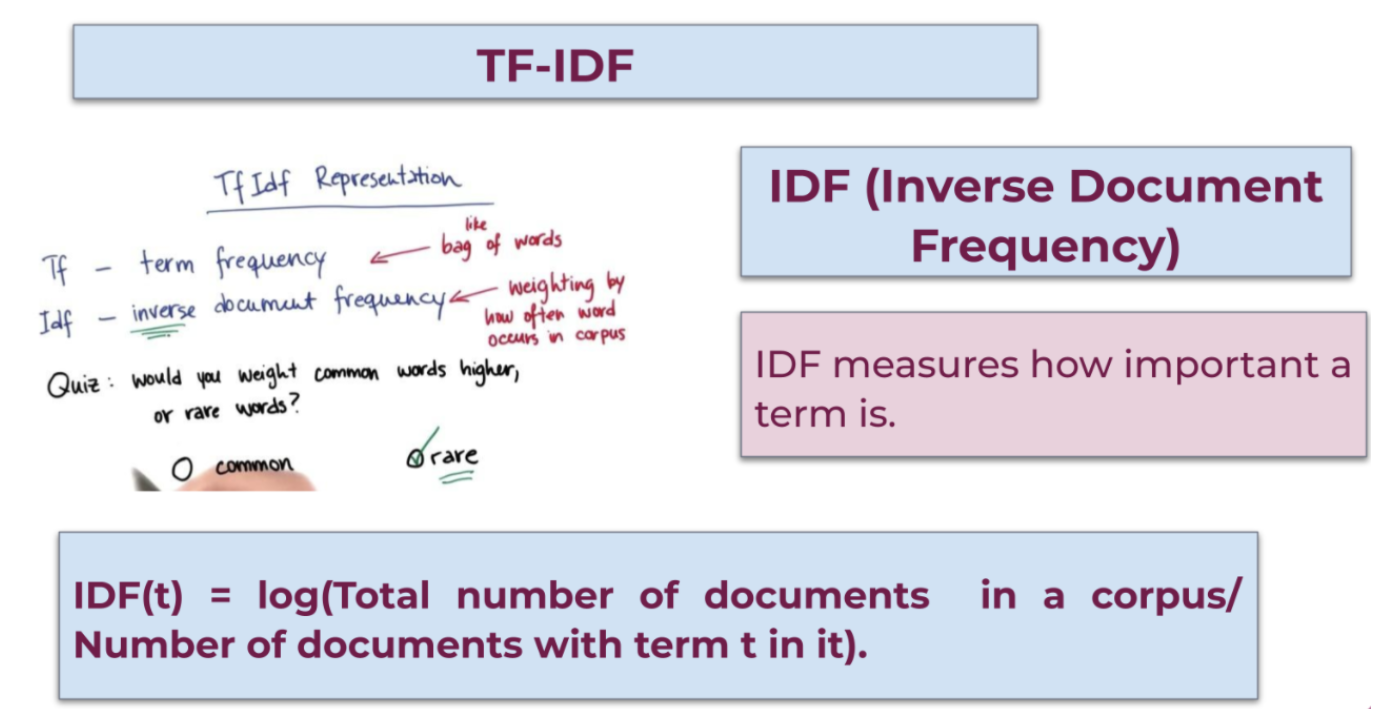

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install and Import

In [ ]:
# !pip install nltk

In [ ]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Tokenization

In [ ]:
# import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
sample_text= "I don't know how many times friends has saved us from depression and sadness , it's the most comforting show , There’s no way you can compare friends with any other tv show.  ❤❤❤"

In [ ]:
sentence_token = sent_tokenize(sample_text.lower())
sentence_token

["i don't know how many times friends has saved us from depression and sadness , it's the most comforting show , there’s no way you can compare friends with any other tv show.",
 '❤❤❤']

In [ ]:
word_token = word_tokenize(sample_text.lower())
print(word_token)

['i', 'do', "n't", 'know', 'how', 'many', 'times', 'friends', 'has', 'saved', 'us', 'from', 'depression', 'and', 'sadness', ',', 'it', "'s", 'the', 'most', 'comforting', 'show', ',', 'there', '’', 's', 'no', 'way', 'you', 'can', 'compare', 'friends', 'with', 'any', 'other', 'tv', 'show', '.', '❤❤❤']


## Removing Punctuation and Numbers

In [ ]:
tokens_without_punc = [w for w in word_token if w.isalpha()] # .isalnum() for number and object
print(tokens_without_punc)

['i', 'do', 'know', 'how', 'many', 'times', 'friends', 'has', 'saved', 'us', 'from', 'depression', 'and', 'sadness', 'it', 'the', 'most', 'comforting', 'show', 'there', 's', 'no', 'way', 'you', 'can', 'compare', 'friends', 'with', 'any', 'other', 'tv', 'show']


## Removing Stopwords

In [ ]:
#nltk.download('stopwords')
# from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(tokens_without_punc)

['i', 'do', 'know', 'how', 'many', 'times', 'friends', 'has', 'saved', 'us', 'from', 'depression', 'and', 'sadness', 'it', 'the', 'most', 'comforting', 'show', 'there', 's', 'no', 'way', 'you', 'can', 'compare', 'friends', 'with', 'any', 'other', 'tv', 'show']


In [ ]:
token_without_sw = [t for t in tokens_without_punc if t not in stop_words] # if you make a sentiment analysis , you can remove negative auxiliary verb                                                                     
token_without_sw

['know',
 'many',
 'times',
 'friends',
 'saved',
 'us',
 'depression',
 'sadness',
 'comforting',
 'show',
 'way',
 'compare',
 'friends',
 'tv',
 'show']

In [ ]:
# [i for i in stop_words if "n't" in i]

## Lemmatization

In [ ]:
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

In [ ]:
WordNetLemmatizer().lemmatize("children")

'child'

In [ ]:
lem = [WordNetLemmatizer().lemmatize(t) for t in token_without_sw]
lem

['know',
 'many',
 'time',
 'friend',
 'saved',
 'u',
 'depression',
 'sadness',
 'comforting',
 'show',
 'way',
 'compare',
 'friend',
 'tv',
 'show']

## Stemming

In [ ]:
# from nltk.stem import PorterStemmer

In [ ]:
PorterStemmer().stem("driving")

'drive'

In [ ]:
stem = [PorterStemmer().stem(t) for t in token_without_sw]
stem

['know',
 'mani',
 'time',
 'friend',
 'save',
 'us',
 'depress',
 'sad',
 'comfort',
 'show',
 'way',
 'compar',
 'friend',
 'tv',
 'show']

## Joining

In [ ]:
" ".join(lem)

'know many time friend saved u depression sadness comforting show way compare friend tv show'

## Cleaning Function - NOT for sentiment analysis

In [ ]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower()) 
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
cleaning(sample_text)

'know many time friend saved u depression sadness comforting show way compare friend tv show'

## Cleaning Function - for sentiment analysis

In [ ]:
sample_text

"I don't know how many times friends has saved us from depression and sadness , it's the most comforting show , There’s no way you can compare friends with any other tv show.  ❤❤❤"

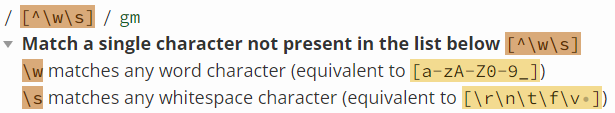

In [ ]:
s = re.sub('[^\w\s]','',sample_text) # drop punctuations
word = word_tokenize(s)
word 

['I',
 'dont',
 'know',
 'how',
 'many',
 'times',
 'friends',
 'has',
 'saved',
 'us',
 'from',
 'depression',
 'and',
 'sadness',
 'its',
 'the',
 'most',
 'comforting',
 'show',
 'Theres',
 'no',
 'way',
 'you',
 'can',
 'compare',
 'friends',
 'with',
 'any',
 'other',
 'tv',
 'show']

In [ ]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    text = re.sub('[^\w\s]','',sample_text)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
cleaning_fsa(sample_text)

'dont know many time friend saved u depression sadness comforting show there way compare friend tv show'

## (PoST) Part of Speech Tagging

In [ ]:
# from nltk import pos_tag
# nltk.download('averaged_perceptron_tagger')

In [ ]:
text = "Steven Paul Jobs was an American business magnate, industrial designer, investor, and media proprietor. He was the chairman, chief executive officer (CEO), and co-founder of Apple Inc.; the chairman and majority shareholder of Pixar; a member of The Walt Disney Company's board of directors following its acquisition of Pixar; and the founder, chairman, and CEO of NeXT. "

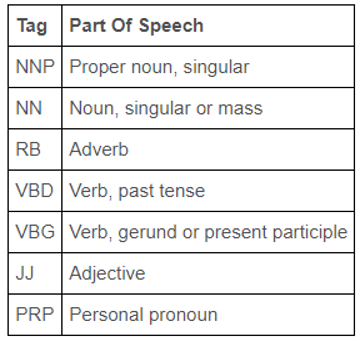

In [ ]:
tokens = word_tokenize(text)
tagg = pos_tag(tokens)
tagg

[('Steven', 'NNP'),
 ('Paul', 'NNP'),
 ('Jobs', 'NNP'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('business', 'NN'),
 ('magnate', 'NN'),
 (',', ','),
 ('industrial', 'JJ'),
 ('designer', 'NN'),
 (',', ','),
 ('investor', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('media', 'NNS'),
 ('proprietor', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('chairman', 'NN'),
 (',', ','),
 ('chief', 'JJ'),
 ('executive', 'NN'),
 ('officer', 'NN'),
 ('(', '('),
 ('CEO', 'NNP'),
 (')', ')'),
 (',', ','),
 ('and', 'CC'),
 ('co-founder', 'NN'),
 ('of', 'IN'),
 ('Apple', 'NNP'),
 ('Inc.', 'NNP'),
 (';', ':'),
 ('the', 'DT'),
 ('chairman', 'NN'),
 ('and', 'CC'),
 ('majority', 'NN'),
 ('shareholder', 'NN'),
 ('of', 'IN'),
 ('Pixar', 'NNP'),
 (';', ':'),
 ('a', 'DT'),
 ('member', 'NN'),
 ('of', 'IN'),
 ('The', 'DT'),
 ('Walt', 'NNP'),
 ('Disney', 'NNP'),
 ('Company', 'NNP'),
 ("'s", 'POS'),
 ('board', 'NN'),
 ('of', 'IN'),
 ('directors', 'NNS'),
 ('following', 'VBG'),
 ('its', 

## NER (Named Entity Recognition)

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [ ]:
ner = tree2conlltags(ne_chunk(tagg))
ner

[('Steven', 'NNP', 'B-PERSON'),
 ('Paul', 'NNP', 'B-PERSON'),
 ('Jobs', 'NNP', 'I-PERSON'),
 ('was', 'VBD', 'O'),
 ('an', 'DT', 'O'),
 ('American', 'JJ', 'B-GPE'),
 ('business', 'NN', 'O'),
 ('magnate', 'NN', 'O'),
 (',', ',', 'O'),
 ('industrial', 'JJ', 'O'),
 ('designer', 'NN', 'O'),
 (',', ',', 'O'),
 ('investor', 'NN', 'O'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('media', 'NNS', 'O'),
 ('proprietor', 'NN', 'O'),
 ('.', '.', 'O'),
 ('He', 'PRP', 'O'),
 ('was', 'VBD', 'O'),
 ('the', 'DT', 'O'),
 ('chairman', 'NN', 'O'),
 (',', ',', 'O'),
 ('chief', 'JJ', 'O'),
 ('executive', 'NN', 'O'),
 ('officer', 'NN', 'O'),
 ('(', '(', 'O'),
 ('CEO', 'NNP', 'B-ORGANIZATION'),
 (')', ')', 'O'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('co-founder', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('Apple', 'NNP', 'B-ORGANIZATION'),
 ('Inc.', 'NNP', 'I-ORGANIZATION'),
 (';', ':', 'O'),
 ('the', 'DT', 'O'),
 ('chairman', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('majority', 'NN', 'O'),
 ('shareholder', 'NN', 'O'),
 ('of

In [ ]:
# ner.draw()

## CountVectorization and TF-IDF Vectorization

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# NLP de biz "text" kısmıyla ve "label" kısmıyla ilgileniyoruz!!
df = df[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [ ]:
df = df.iloc[:100, :]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
95,negative,"@VirginAmerica Is it me, or is your website do..."
96,negative,@VirginAmerica I can't check in or add a bag. ...
97,negative,@VirginAmerica - Let 2 scanned in passengers l...
98,negative,@virginamerica What is your phone number. I ca...


In [ ]:
df2 = df.copy()

In [ ]:
df2["text"] = df2["text"].apply(cleaning)

In [ ]:
df2

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
...,...,...
95,negative,virginamerica website btw new website great us...
96,negative,virginamerica ca check add bag website working...
97,negative,virginamerica let scanned passenger leave plan...
98,negative,virginamerica phone number ca find call flight...


## CountVectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X = df2["text"]
y = df2["airline_sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 42)

In [ ]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# fit burada tüm tokenleri sayıyor. sonra da teker teker öncelikle TF fonksiyonunu uyguluyor. 
#  sonra IDF bulmak için bu kelimeler tüm dokümanlarda geçmiş mi geçmemiş mi onları sayıyor. 
# transform deyince de TF-IDF katsayısını hesaplayıp buluyor.

In [ ]:
vectorizer.get_feature_names()

['able',
 'account',
 'add',
 'added',
 'adding',
 'aggressive',
 'ago',
 'air',
 'airline',
 'already',
 'amazing',
 'amazingly',
 'america',
 'amp',
 'andrew',
 'angeles',
 'anything',
 'anytime',
 'anyway',
 'applied',
 'asap',
 'australia',
 'available',
 'awaiting',
 'award',
 'away',
 'awesome',
 'back',
 'bag',
 'baggage',
 'best',
 'better',
 'beyond',
 'bid',
 'blast',
 'blew',
 'book',
 'booked',
 'bos',
 'business',
 'ca',
 'call',
 'called',
 'cancelled',
 'card',
 'carrie',
 'carrier',
 'carrieunderwood',
 'change',
 'chat',
 'check',
 'club',
 'cold',
 'commercial',
 'congrats',
 'could',
 'country',
 'credit',
 'crew',
 'cross',
 'current',
 'customer',
 'dal',
 'dallas',
 'deal',
 'dhepburn',
 'different',
 'doom',
 'downtown',
 'dreampath',
 'due',
 'eat',
 'either',
 'elevate',
 'elevategold',
 'entertaining',
 'entertainment',
 'even',
 'everything',
 'excited',
 'experience',
 'fabulous',
 'face',
 'fail',
 'fare',
 'feb',
 'fee',
 'film',
 'find',
 'fine',
 'first'

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,able,account,add,added,adding,aggressive,ago,air,airline,already,amazing,amazingly,america,amp,andrew,angeles,anything,anytime,anyway,applied,asap,australia,available,awaiting,award,...,use,vegan,vent,view,virgin,virginamerica,virginmedia,waive,want,watch,way,website,week,well,wife,win,winning,wo,working,worried,worry,worstflightever,would,wow,yet
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train.iloc[-1]

'virginamerica first fare may three time carrier seat available select'

In [ ]:
vectorizer.vocabulary_

{'able': 0,
 'account': 1,
 'add': 2,
 'added': 3,
 'adding': 4,
 'aggressive': 5,
 'ago': 6,
 'air': 7,
 'airline': 8,
 'already': 9,
 'amazing': 10,
 'amazingly': 11,
 'america': 12,
 'amp': 13,
 'andrew': 14,
 'angeles': 15,
 'anything': 16,
 'anytime': 17,
 'anyway': 18,
 'applied': 19,
 'asap': 20,
 'australia': 21,
 'available': 22,
 'awaiting': 23,
 'award': 24,
 'away': 25,
 'awesome': 26,
 'back': 27,
 'bag': 28,
 'baggage': 29,
 'best': 30,
 'better': 31,
 'beyond': 32,
 'bid': 33,
 'blast': 34,
 'blew': 35,
 'book': 36,
 'booked': 37,
 'bos': 38,
 'business': 39,
 'ca': 40,
 'call': 41,
 'called': 42,
 'cancelled': 43,
 'card': 44,
 'carrie': 45,
 'carrier': 46,
 'carrieunderwood': 47,
 'change': 48,
 'chat': 49,
 'check': 50,
 'club': 51,
 'cold': 52,
 'commercial': 53,
 'congrats': 54,
 'could': 55,
 'country': 56,
 'credit': 57,
 'crew': 58,
 'cross': 59,
 'current': 60,
 'customer': 61,
 'dal': 62,
 'dallas': 63,
 'deal': 64,
 'dhepburn': 65,
 'different': 66,
 'doom': 6

## TF-IDF

sklearn TD-IDF
https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
tf_idf_vectorizer.get_feature_names()

['able',
 'account',
 'add',
 'added',
 'adding',
 'aggressive',
 'ago',
 'air',
 'airline',
 'already',
 'amazing',
 'amazingly',
 'america',
 'amp',
 'andrew',
 'angeles',
 'anything',
 'anytime',
 'anyway',
 'applied',
 'asap',
 'australia',
 'available',
 'awaiting',
 'award',
 'away',
 'awesome',
 'back',
 'bag',
 'baggage',
 'best',
 'better',
 'beyond',
 'bid',
 'blast',
 'blew',
 'book',
 'booked',
 'bos',
 'business',
 'ca',
 'call',
 'called',
 'cancelled',
 'card',
 'carrie',
 'carrier',
 'carrieunderwood',
 'change',
 'chat',
 'check',
 'club',
 'cold',
 'commercial',
 'congrats',
 'could',
 'country',
 'credit',
 'crew',
 'cross',
 'current',
 'customer',
 'dal',
 'dallas',
 'deal',
 'dhepburn',
 'different',
 'doom',
 'downtown',
 'dreampath',
 'due',
 'eat',
 'either',
 'elevate',
 'elevategold',
 'entertaining',
 'entertainment',
 'even',
 'everything',
 'excited',
 'experience',
 'fabulous',
 'face',
 'fail',
 'fare',
 'feb',
 'fee',
 'film',
 'find',
 'fine',
 'first'

In [ ]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.32400615, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,able,account,add,added,adding,aggressive,ago,air,airline,already,amazing,amazingly,america,amp,andrew,angeles,anything,anytime,anyway,applied,asap,australia,available,awaiting,award,...,use,vegan,vent,view,virgin,virginamerica,virginmedia,waive,want,watch,way,website,week,well,wife,win,winning,wo,working,worried,worry,worstflightever,would,wow,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.115006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487475,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.088818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.077427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335701,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.079199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.108340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.0,0.0,0.461127,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.108790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
46,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.302007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.078787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333952,0.0,0.0,0.000000,0.0,0.0
47,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.096794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
48,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.358278,0.0,...,0.358278,0.0,0.0,0.0,0.0,0.084526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.324006,0.0,0.0


In [ ]:
X_train.iloc[-1]

'virginamerica first fare may three time carrier seat available select'

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names()).iloc[-1].sort_values(ascending=False)[:20]
# virginamerica tüm dokümanlarda geçtiği için doğal olarak onun ağırlığını azaltmış. en hafifi o olmuş.

three              0.351315
may                0.351315
select             0.351315
carrier            0.351315
available          0.351315
fare               0.351315
seat               0.317709
time               0.275370
first              0.275370
virginamerica      0.082883
entertainment      0.000000
even               0.000000
foot               0.000000
food               0.000000
due                0.000000
flying             0.000000
fly                0.000000
flightattendant    0.000000
flight             0.000000
flew               0.000000
Name: 49, dtype: float64

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,able,account,add,added,adding,aggressive,ago,air,airline,already,amazing,amazingly,america,amp,andrew,angeles,anything,anytime,anyway,applied,asap,australia,available,awaiting,award,...,use,vegan,vent,view,virgin,virginamerica,virginmedia,waive,want,watch,way,website,week,well,wife,win,winning,wo,working,worried,worry,worstflightever,would,wow,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.115006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487475,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.088818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.077427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335701,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.079199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.108340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.0,0.0,0.461127,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.108790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
46,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.302007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.078787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333952,0.0,0.0,0.000000,0.0,0.0
47,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.096794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
48,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.358278,0.0,...,0.358278,0.0,0.0,0.0,0.0,0.084526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.324006,0.0,0.0


## Word Cloud

In [ ]:
# !pip install WordCloud
# from wordcloud import WordCloud

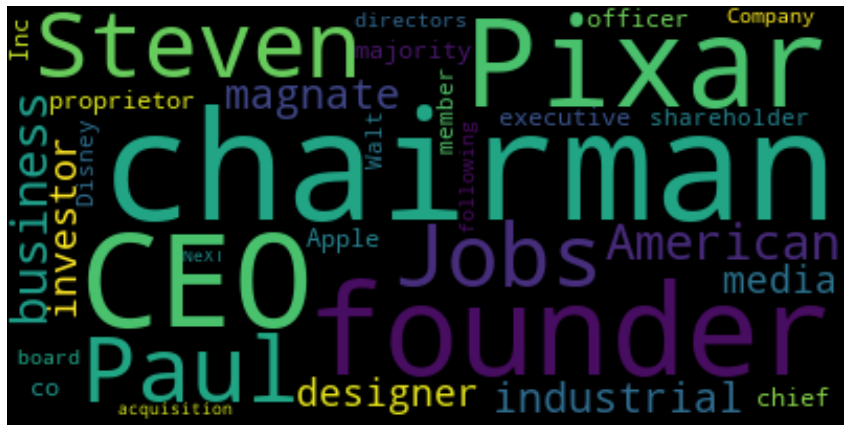

In [ ]:
wordcloud = WordCloud(background_color="black", max_words=len(text))
wordcloud.generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()